# Surnjani Djoko May 4th 2022
## Process the UI dataset and perform evaluation

In [1]:
import pandas as pd
import numpy as np

import nltk
#nltk.download('punkt') ########### NEED TO ADD THIS in Colab!!
from nltk.tokenize import word_tokenize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess

import spacy
#nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Prepare UI dataset

In [3]:
def preprocessing_UI(text):
   
    ## (1) Convert to lower cases
    new_text = " ".join([word.lower() for word in text.split()])
    # (2) Remove words with a length below 2 characters
    new_text = ' '.join([word for word in new_text.split() if len(word) > 1 ])
    
    ## (3) Removal of URL's
    import re
    def remove_urls(text):
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        # remove words starting with https and with www
        return url_pattern.sub(r'', text)

    new_text = remove_urls(new_text)
    
    # (4) Replace multiple white spaces with one white space
    new_text = ' '.join([word for word in new_text.split() ])

    # (5) Remove numbers (how to judge if the number is relevant??)
    new_text = ' '.join([word for word in new_text.split() if not word.isdigit()])
    # number was not remove earlier
    new_text = new_text.replace(r'\d+','')
    
    # (7) Remove all punctuations (for example, parenthesis, comma, period, etc.) 
    new_text = new_text.replace('[^\w\s]','')

    # (8) Remove Emails
    new_text = ''.join([re.sub('\S*@\S*\s?','', word) for word in new_text])
    
    # (9) Remove new line characters
    new_text = "".join([re.sub('\s+',' ', word) for word in new_text])

    # (10) Remove distracting single quotes
    new_text = ''.join([re.sub("\'","", word) for word in new_text])

    # (12) Expand contractions 
    import contractions

    new_text = ' '.join([contractions.fix(word) for word in new_text.split() ])

    # (13) remove stopwords (the, to be, etc.)
    # nltk.download('stopwords') # already downloaded and up to date.

    from nltk.corpus import stopwords

    STOPWORDS = stopwords.words('english')

    # Function to remove the stopwords
    def stopwords(text):
        return " ".join([word for word in str(text).split() if word not in STOPWORDS])

    # Applying the stopwords to 'title'
    new_text = stopwords(new_text)
    
    # Spacy has more stopwords
    import spacy
    #loading the english language small model of spacy
    en = spacy.load('en_core_web_sm')
    sw_spacy = en.Defaults.stop_words
    
    # remove more stopwords from Spacy
    def spacy_stopwords(text):
        return " ".join([word for word in str(text).split() if word not in sw_spacy])

    # Applying the stopwords 
    new_text = spacy_stopwords(new_text)

    # (14) Lemmatization (convert words into its base form)
    from nltk.stem.wordnet import WordNetLemmatizer

    lmtzr =  WordNetLemmatizer()
    new_text = ' '.join([lmtzr.lemmatize(word,'v') for word in new_text.split() ])

    # (15) Stemming 
    from nltk.stem import PorterStemmer

    ps =PorterStemmer()
    new_text = ' '.join([ps.stem(word) for word in new_text.split() ])

    return new_text

In [4]:
#new_text = preprocessing_UI("politics president election")
new_text = preprocessing_UI("tiffani trump wear pretti bridesmaid dress")

In [5]:
token_words = word_tokenize(new_text)
token_words

['tiffani', 'trump', 'wear', 'pretti', 'bridesmaid', 'dress']

In [6]:
def make_trigrams(texts):
    return trigram_mod[bigram_mod[texts]] 

In [7]:
# load all needed models and dictionary 
bigram_mod = Phraser.load('full_sample/bigram_model_data_set1_train_clean_2')
trigram_mod = Phraser.load('full_sample/trigram_model_data_set1_train_clean_2')

DICT_PATH="full_sample/id2word_50k_filtered_full" 
id2word = corpora.Dictionary.load(DICT_PATH)

In [9]:
# my model
'''
with open('full_sample/lda_model_25.pk', 'rb') as pickle_file:
    bestModel = pickle.load(pickle_file)
'''

aws_lda_model = gensim.models.LdaMulticore.load('full_sample/AWS_model/default_model')

In [10]:
# print the topics 
from pprint import pprint
num_topics = 25
for i in range(num_topics):
    print('Topic number', i)
    pprint(aws_lda_model.show_topic(i, topn=15))
    print('\n')

Topic number 0
[('polic', 0.031807803),
 ('attack', 0.017330486),
 ('kill', 0.015027743),
 ('offic', 0.014076063),
 ('shoot', 0.01348002),
 ('protest', 0.013116305),
 ('arrest', 0.009374435),
 ('gun', 0.009340849),
 ('report', 0.008940319),
 ('man', 0.008586108),
 ('forc', 0.0085224025),
 ('group', 0.00804328),
 ('death', 0.0076142536),
 ('tell', 0.0068157017),
 ('peopl', 0.006794543)]


Topic number 1
[('think', 0.033763815),
 ('know', 0.02262149),
 ('want', 0.02134621),
 ('thing', 0.021225134),
 ('time', 0.017816113),
 ('feel', 0.015065667),
 ('tell', 0.01405196),
 ('come', 0.013356213),
 ('good', 0.013194387),
 ('way', 0.012936886),
 ('lot', 0.012415153),
 ('peopl', 0.01143853),
 ('look', 0.010421506),
 ('talk', 0.009576172),
 ('happen', 0.009359316)]


Topic number 2
[('investig', 0.01626385),
 ('court', 0.016249003),
 ('case', 0.015048117),
 ('feder', 0.013762076),
 ('report', 0.011473223),
 ('law', 0.011459814),
 ('state', 0.009747958),
 ('rule', 0.009527502),
 ('depart', 0.00936

In [54]:
# print the topics 
from pprint import pprint
num_topics = 25
for i in range(num_topics):
    print('Topic number', i)
    pprint(bestModel.show_topic(i, topn=15))
    print('\n')

Topic number 0
[('polic', 0.033206142),
 ('kill', 0.019399807),
 ('attack', 0.018491102),
 ('offic', 0.017574709),
 ('shoot', 0.013846522),
 ('death', 0.012086386),
 ('report', 0.011993651),
 ('man', 0.011807147),
 ('protest', 0.010824574),
 ('tell', 0.010535442),
 ('arrest', 0.010045838),
 ('gun', 0.008650407),
 ('peopl', 0.008521285),
 ('crime', 0.0068370053),
 ('murder', 0.0066459225)]


Topic number 1
[('medium', 0.032342467),
 ('social', 0.023551296),
 ('post', 0.021658557),
 ('video', 0.021544073),
 ('twitter', 0.015912933),
 ('facebook', 0.015806418),
 ('news', 0.014605139),
 ('ad', 0.013169001),
 ('user', 0.011236461),
 ('platform', 0.010425196),
 ('use', 0.010406608),
 ('comment', 0.010389956),
 ('stori', 0.010156284),
 ('content', 0.010094344),
 ('internet', 0.009803359)]


Topic number 2
[('court', 0.028727023),
 ('case', 0.027314795),
 ('feder', 0.0219471),
 ('law', 0.021345444),
 ('rule', 0.021013595),
 ('state', 0.019610785),
 ('order', 0.017560778),
 ('trial', 0.01701439

In [135]:
topics = bestModel.show_topics(num_topics=25, num_words=5, formatted=False)
topics = sorted(topics, key=lambda x: int(x[0]))
print("Num topics {}".format(len(topics)))
topics

Num topics 25


[(0,
  [('polic', 0.033206135),
   ('kill', 0.019399803),
   ('attack', 0.018491099),
   ('offic', 0.017574705),
   ('shoot', 0.013846519)]),
 (1,
  [('medium', 0.032342464),
   ('social', 0.023551295),
   ('post', 0.021658555),
   ('video', 0.02154407),
   ('twitter', 0.015912931)]),
 (2,
  [('court', 0.028727021),
   ('case', 0.027314793),
   ('feder', 0.021947099),
   ('law', 0.021345442),
   ('rule', 0.021013593)]),
 (3,
  [('use', 0.020006752),
   ('new', 0.014529673),
   ('amazon', 0.0130286915),
   ('technolog', 0.01089144),
   ('product', 0.010095514)]),
 (4,
  [('day', 0.056589197),
   ('week', 0.03654203),
   ('time', 0.030975865),
   ('travel', 0.026854364),
   ('hour', 0.019459708)]),
 (5,
  [('flight', 0.017136564),
   ('air', 0.014983698),
   ('ship', 0.013314338),
   ('fire', 0.009827394),
   ('test', 0.009088419)]),
 (6,
  [('film', 0.02024286),
   ('music', 0.018328153),
   ('play', 0.013313002),
   ('perform', 0.01178998),
   ('new', 0.011139546)]),
 (7,
  [('home', 0

In [127]:
topic_des_dict = {
"Topic number": ['Topic 0',
'Topic 1',
'Topic 2',
'Topic 3',
'Topic 4',
'Topic 5',
'Topic 7',
'Topic 8',
'Topic 9',
'Topic 10',
'Topic 11',
'Topic 12',
'Topic 13',
'Topic 14',
'Topic 15',
'Topic 16',
'Topic 17',
'Topic 18',
'Topic 19',
'Topic 20',
'Topic 21',
'Topic 23',
'Topic 24'],
    
"Topic description": ['politic, attack and crime',
'social media and platform',
'Legal and immigrant issuew',
'technology related such as product, company',
'time, meeting, travel',
'natural and man made disastor and issues, including air and land',
'location, housing/building issues',
'fashion and branding',
'history, art and education',
'sport, game, team, player',
'stock market',
'russion related ......',
'health, drug, disease, viru and outbreak',
'people action in general .....',
'gender and race related issues',
'energy and climate issues',
'domestic issues, daily living and family',
'US politic, bill, compaign, government personal',
'Non US politic/country/security',
'Economic, companies revenue, market, etc.',
'food, bar, restaurant',
'work related such as role, company, etc.',
'funding and taxing with government'],

    # TO BE UPDATED with sme's names
"SME" : [
'Topic 0',
'Topic 1',
'Topic 2',
'Topic 3',
'Topic 4',
'Topic 5',
'Topic 7',
'Topic 8',
'Topic 9',
'Topic 10',
'Topic 11',
'Topic 12',
'Topic 13',
'Topic 14',
'Topic 15',
'Topic 16',
'Topic 17',
'Topic 18',
'Topic 19',
'Topic 20',
'Topic 21',
'Topic 23',
'Topic 24']
}
    
topic_des_pd = pd.DataFrame(topic_des_dict)

In [128]:
topic_des_pd

,Topic number,Topic description,SME
0,Topic 0,"politic, attack and crime",Topic 0
1,Topic 1,social media and platform,Topic 1
2,Topic 2,Legal and immigrant issuew,Topic 2
3,Topic 3,"technology related such as product, company",Topic 3
4,Topic 4,"time, meeting, travel",Topic 4
5,Topic 5,"natural and man made disastor and issues, incl...",Topic 5
6,Topic 7,"location, housing/building issues",Topic 7
7,Topic 8,fashion and branding,Topic 8
8,Topic 9,"history, art and education",Topic 9
9,Topic 10,"sport, game, team, player",Topic 10


In [39]:
token_words_trigrams = make_trigrams(token_words)

In [40]:
token_words_trigrams

['tiffani', 'trump', 'wear', 'pretti', 'bridesmaid', 'dress']

In [41]:
nlp = spacy.load("en_core_web_sm")
# test with lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    doc = nlp(" ".join(texts)) 
    print(doc)
    texts_out = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    return texts_out

token_words_trigrams_lemm = lemmatization(token_words_trigrams, 
                                        allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

tiffani trump wear pretti bridesmaid dress


In [42]:
token_words_trigrams_lemm[:]

['dress']

# Test with lemmatization

In [131]:
# create term document frequency
corpus_text = id2word.doc2bow(token_words_trigrams_lemm)
corpus_text

[(65, 1)]

In [132]:
bestModel[corpus_text]

[(0, 0.05324047),
 (1, 0.04436673),
 (2, 0.038028624),
 (3, 0.03327504),
 (4, 0.029577818),
 (5, 0.026620034),
 (6, 0.024200032),
 (7, 0.022183364),
 (8, 0.520467),
 (9, 0.019014312),
 (10, 0.01774669),
 (11, 0.01663752),
 (12, 0.015658844),
 (13, 0.014788909),
 (14, 0.014010545),
 (15, 0.013310017),
 (16, 0.012676207),
 (17, 0.012100016),
 (18, 0.011573929),
 (19, 0.011091682),
 (20, 0.010648013),
 (21, 0.010238475)]

In [133]:
top_topics = bestModel.get_document_topics(corpus_text, minimum_probability=0.0)
top_topics

[(0, 0.053240467),
 (1, 0.044366725),
 (2, 0.03802862),
 (3, 0.03327504),
 (4, 0.029577816),
 (5, 0.026620032),
 (6, 0.024200032),
 (7, 0.022183362),
 (8, 0.520467),
 (9, 0.01901431),
 (10, 0.017746689),
 (11, 0.01663752),
 (12, 0.015658844),
 (13, 0.014788908),
 (14, 0.014010544),
 (15, 0.013310016),
 (16, 0.012676206),
 (17, 0.012100016),
 (18, 0.011573928),
 (19, 0.011091681),
 (20, 0.010648013),
 (21, 0.010238474),
 (22, 0.009859272),
 (23, 0.009507155),
 (24, 0.009179322)]

In [134]:
top_topics = bestModel.get_document_topics(corpus_text, minimum_probability=0.2)
top_topics

[(8, 0.520467)]

# Visualization

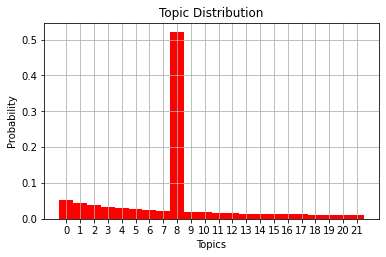

In [136]:
doc_vec = bestModel[corpus_text]
y_axis = []
x_axis = []
for topic_id, dist in (doc_vec):
    x_axis.append(topic_id)
    y_axis.append(dist)
width = 1 

plt.bar(x_axis, y_axis, width, align='center', color='r')
plt.xlabel('Topics')
plt.ylabel('Probability')
plt.title('Topic Distribution')
plt.subplots_adjust(bottom=0.2)
plt.gca().set_xticks(x_axis)
plt.grid()
plt.show()
#plt.savefig(output_path)
plt.close()

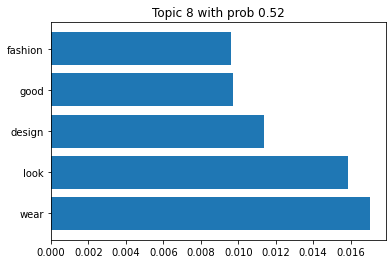

In [137]:
figs = {}
axs = {}
idx = 0
for topic_id, word_props in topics:
    for top_topic_id, top_topic_props in top_topics:
        if (top_topic_id == topic_id):
            words, probs = zip(*word_props)
            figs[idx] = plt.figure()
            axs[idx] = figs[idx].add_subplot(111)
            axs[idx].barh(words, probs)
            title ='Topic '+ str(top_topic_id) + ' with prob ' + "{:.2f}".format(top_topic_props)
            axs[idx].set_title(title)
            